# tone cuve for color picture

## plotするための処理


In [48]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import cv2

def plot_rgb_hist(rgb_img, ax, ticks=None):
    color=['r','g','b']
    for (i,col) in enumerate(color):
        hist = cv2.calcHist([rgb_img], [i], None, [256], [0,256])
        hist = np.sqrt(hist)
        ax.plot(hist,color=col)

    if ticks:
        ax.set_xticks(ticks)
    ax.set_title('histogram')
    ax.set_xlim([0,256])

    return ax


def plot_tonecurve(f,rgb_img):
    fig = plt.figure(figsize=(15,5))
    gs = gridspec.GridSpec(2,3)
    x = np.arange(256)

    # center of tone curve
    sns.set_style('darkgrid')
    ax2 = fig.add_subplot(gs[:,1])
    ax2.set_title('Tone Curve')
    ticks = [0,42,84,127,169,211,255]
    ax2.set_xlabel('Input')
    ax2.set_ylabel('Output')
    ax2.set_xticks(ticks)
    ax2.set_yticks(ticks)
    ax2.plot(x, f(x))
    ax2.plot(x, x,linestyle=":",color="m")
    
    
    sns.set_style('ticks')
    ax1 = fig.add_subplot(gs[0,0])
    ax1.set_title('input image >>')
    ax1.imshow(rgb_img)
    
    #delete ticks
    ax1.set_xticks([]), ax1.set_yticks([])  

    
    out_rgb_img = np.array([f(a).astype('uint8') for a in rgb_img])

    ax3 = fig.add_subplot(gs[0,2])
    ax3.set_title('>> output image')
    ax3.imshow(out_rgb_img)
    ax3.set_xticks([]), ax3.set_yticks([])

    #histgram
    sns.set_style(style='whitegrid')
    ax4 = fig.add_subplot(gs[1,0])
    ax4 = plot_rgb_hist(rgb_img, ax4, ticks)
    ax5 = fig.add_subplot(gs[1,2])
    ax5 = plot_rgb_hist(out_rgb_img, ax5, ticks)

    plt.show()


## 入力画像

In [36]:
pdr = cv2.cvtColor(cv2.imread('imgs/sunset.jpg',1), cv2.COLOR_BGR2RGB)

In [37]:
def step_plot(x):
    th1_data=30
    th2_data=190
    delta_x=th2_data-th1_data
    a= 255/delta_x
    _x=np.where(x<th1_data,0,a*(x-th1_data))
    y=np.where(_x>255,255,_x)
    return(y)

## 折れ線型トーンカーブ

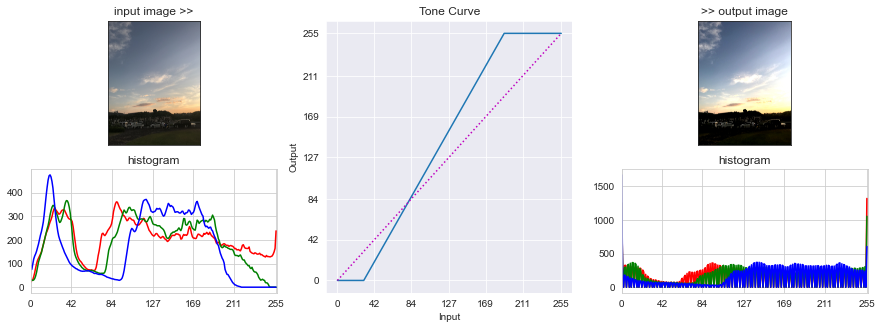

In [38]:
plot_tonecurve(step_plot,pdr)

## sin curve

In [62]:
def s2_plot(x):
    y = (np.sin(np.pi * (x/255 - 0.5)*6) + 1) * 255
    return y

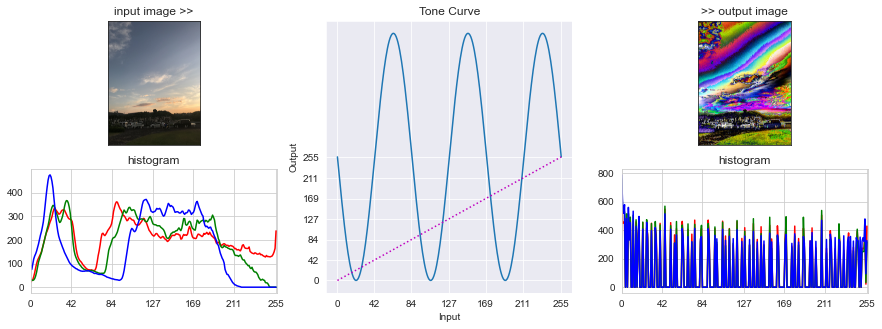

In [63]:
plot_tonecurve(s2_plot,pdr)

In [43]:
def curve_gamma1(x):
    gamma = 2
    y = 255*(x/255)**(1/gamma)
    return y

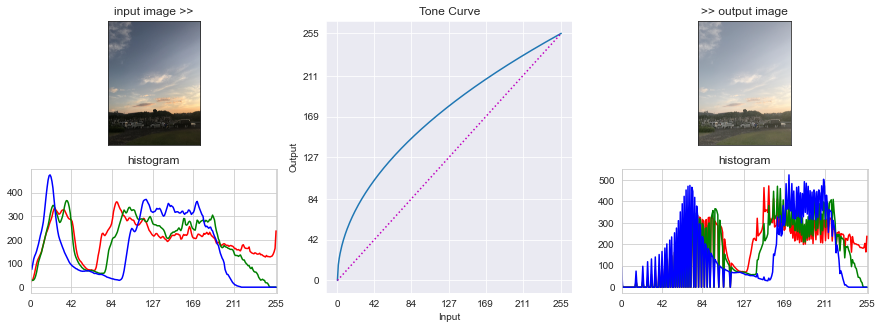

In [44]:
plot_tonecurve(curve_gamma1,pdr)

In [45]:
def curve_gamma2(x):
    gamma = 1/2
    y = 255*(x/255)**(1/gamma)
    return y

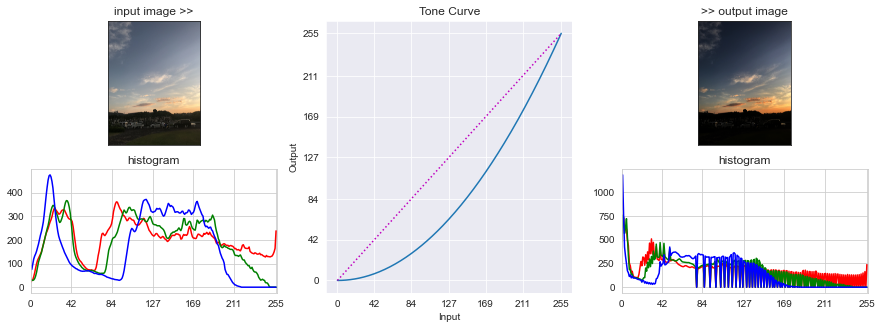

In [46]:
plot_tonecurve(curve_gamma2,pdr)